In [18]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.metrics import mean_absolute_error, r2_score
from sklearn.model_selection import train_test_split


In [19]:
exercise = pd.read_csv("exercise.csv")
calories = pd.read_csv("calories.csv")

In [20]:
df = exercise.merge(calories, on="User_ID")

In [21]:
df.head()

,User_ID,Gender,Age,Height,Weight,Duration,Heart_Rate,Body_Temp,Calories
0,14733363,male,68,190.0,94.0,29.0,105.0,40.8,231.0
1,14861698,female,20,166.0,60.0,14.0,94.0,40.3,66.0
2,11179863,male,69,179.0,79.0,5.0,88.0,38.7,26.0
3,16180408,female,34,179.0,71.0,13.0,100.0,40.5,71.0
4,17771927,female,27,154.0,58.0,10.0,81.0,39.8,35.0


In [22]:
df["Gender"] = df["Gender"].map({"male":0, "female":1})

df ['BMI'] = df['Weight'] / (df['Height'] / 100 ) ** 2



In [23]:
X = df [ ['Gender', 'Age', 'Height', 'Weight', 'Duration', 'Heart_Rate', 'Body_Temp','BMI' ]]
y = df ['Calories' ]

In [24]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [25]:
#----------------Data Visualization----------------

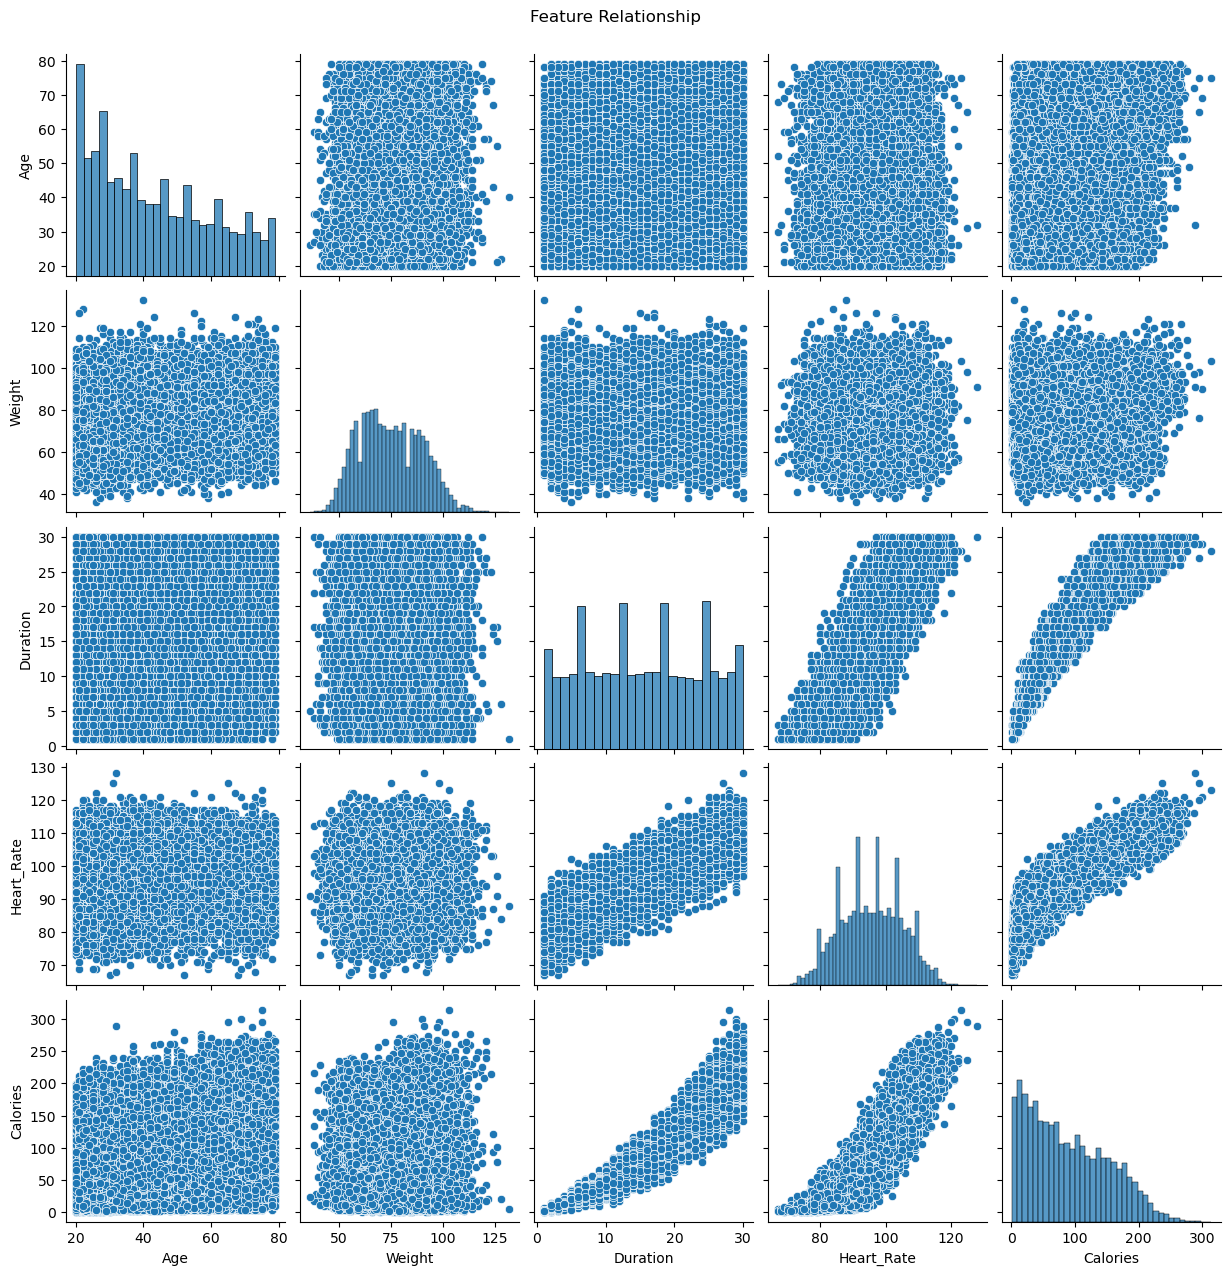

In [26]:
sns.pairplot(df [ ['Age', 'Weight', 'Duration', 'Heart_Rate', 'Calories' ]])
plt.suptitle("Feature Relationship",y=1.02)
plt.show()

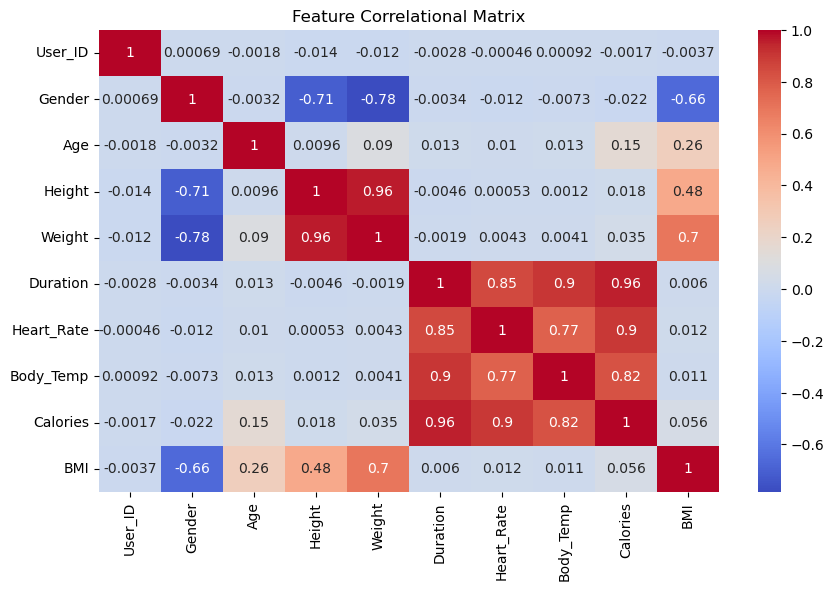

In [27]:
#correlation heatmap
plt.figure(figsize=(10,6))
sns.heatmap(df.corr(numeric_only=True), annot=True, cmap='coolwarm')
plt.title('Feature Correlational Matrix')
plt. show()

In [28]:
from sklearn. linear_model import LinearRegression
from sklearn. ensemble import RandomForestRegressor
from xgboost import XGBRegressor

models = {
        
    "Linear Regression": LinearRegression(),
    "Random Forest": RandomForestRegressor(n_estimators=100),
    "XGBoost": XGBRegressor(n_estimators=100, learning_rate=0.1)
}

In [29]:
results = {}

for name, model in models.items():
    model.fit(X_train, y_train)
    preds = model. predict(X_test)
    
    results [name] = {
        "MAE" : mean_absolute_error(y_test, preds),
        "R2" : r2_score(y_test, preds),
        "Model" : model
    }

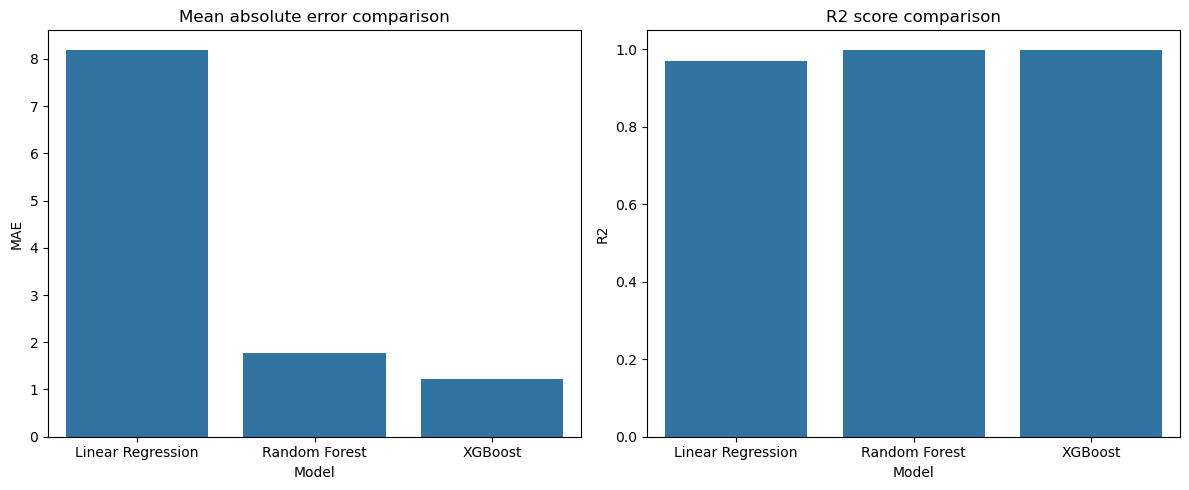

In [30]:
 #metrics comparison
metrics_df = pd. DataFrame({
    "Model" : results. keys ( ),
    "MAE" : [x ['MAE' ] for x in results.values () ],
    "R2" : [x ['R2'] for x in results.values ( ) ]
})

plt.figure(figsize=(12,5))
plt.subplot(1,2,1)
sns.barplot(x='Model', y='MAE', data=metrics_df)
plt.title('Mean absolute error comparison')

plt.subplot(1,2,2)
sns.barplot(x='Model', y='R2', data=metrics_df)
plt.title('R2 score comparison' )
plt.tight_layout ()
plt.show()

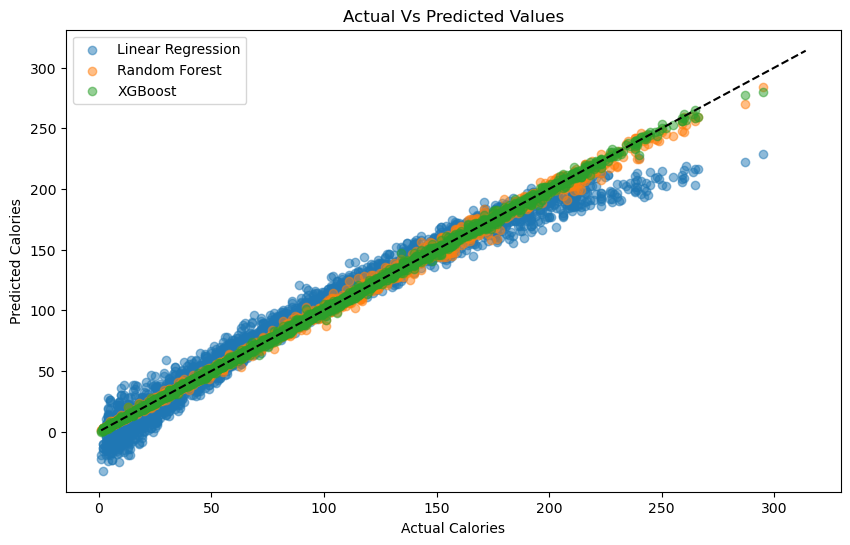

In [31]:
#actual vs predicted plot

plt.figure(figsize=(10, 6))
for i, (name, res) in enumerate(results.items()):
    plt.scatter(y_test, res ['Model' ].predict(X_test), alpha=0.5, label=name)

plt.plot([y.min(), y.max()], [y.min(), y.max()], 'k--')
plt.xlabel('Actual Calories')
plt.ylabel('Predicted Calories')
plt.title('Actual Vs Predicted Values')
plt. legend ( )
plt. show()

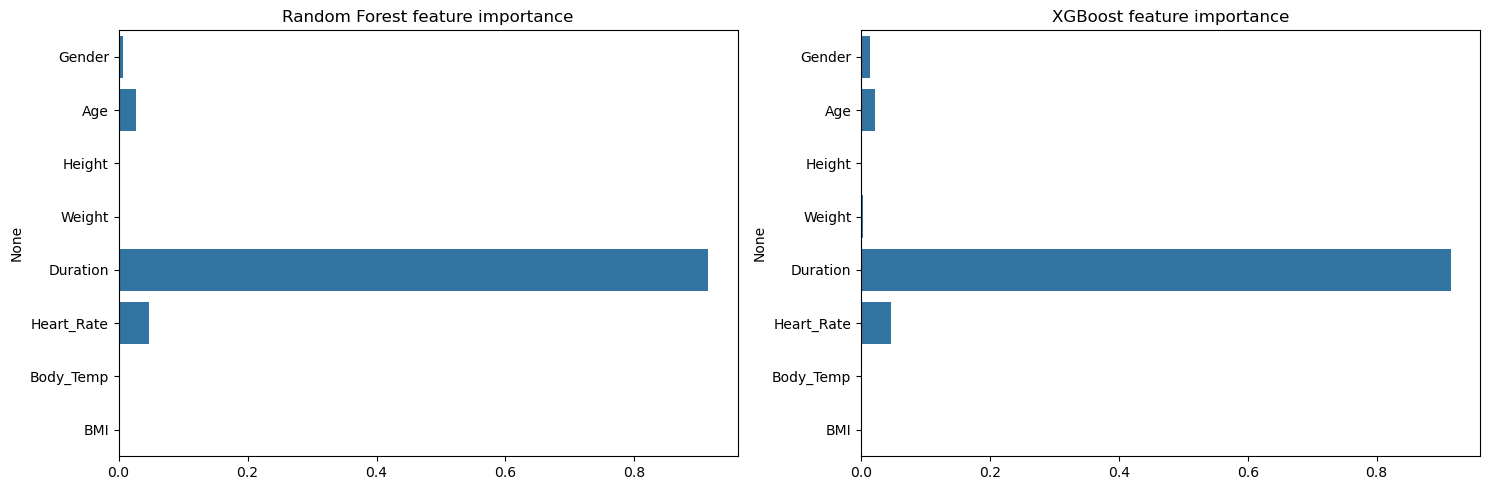

In [32]:
#Random Forest
fig, ax = plt.subplots(1, 2, figsize=(15, 5))

rf_importances = results ['Random Forest' ] ['Model']. feature_importances_
sns.barplot(x=rf_importances, y=X. columns, ax=ax[0])
ax [0].set_title('Random Forest feature importance' )

#XGBoost
xgb_importances = results ['XGBoost' ] ['Model']. feature_importances_
sns.barplot(x=xgb_importances, y=X. columns, ax=ax[1])
ax[1].set_title('XGBoost feature importance')
plt.tight_layout ()
plt. show( )

In [33]:
#-----------Predict Calories Burned--------------------

In [34]:
#@title Predict Calories Burned
Gender = "male" #@param ["male", "female"]
Age = 50 #@param {type:"slider", min: 15, max:80, step:1}
Height = 175 #@param {type:"slider", min:140, max:220, step:1}
Weight = 70 #@param {type:"slider", min:40, max:150, step:1}
Duration = 45 #@param {type:"slider", min:10, max: 120, step:1}
Heart_Rate = 120 #@param {type:"slider", min:60, max:200, step:1}
Body_Temp =37.2 #@param {type:"slider", min:36.0, max:42.0, step:0.1}

In [35]:
#preprocess input
input_data = pd. DataFrame([[Gender, Age, Height, Weight, Duration, Heart_Rate, Body_Temp]],
columns=['Gender', 'Age', 'Height', 'Weight', 'Duration', 'Heart_Rate', 'Body_Temp' ]
                          )

input_data['Gender'] = input_data['Gender'].map({'male':0, 'female':1})
input_data['BMI'] = input_data['Weight'] / (input_data['Height']/100) ** 2

In [36]:
#generate predictions

predictions = {}

for name, res in results.items() :
    predictions [name] = res ['Model'].predict(input_data) [0]

# Display results
print("Prediction results:")
for model, cal in predictions.items():
    print(f"- {model}: {float(cal):.1f} kcal")


Prediction results:
- Linear Regression: 382.0 kcal
- Random Forest: 253.2 kcal
- XGBoost: 260.5 kcal


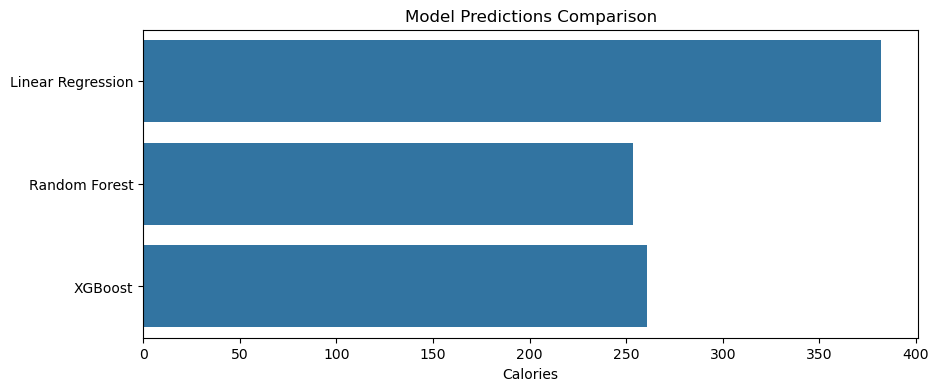

In [37]:
plt.figure(figsize=(10,4))
sns.barplot(x=list(predictions.values()), y=list(predictions.keys()))
plt.xlabel('Calories')
plt.title("Model Predictions Comparison")
plt. show( )

In [38]:
import pickle

# choose your best model
best_model = models["Random Forest"]   # or "XGBoost"

# save model
with open("calories_model.pkl", "wb") as f:
    pickle.dump(best_model, f)

print("Model saved successfully!")


Model saved successfully!


In [39]:
from sklearn.linear_model import LinearRegression

lr_model = LinearRegression()
lr_model.fit(X_train, y_train)


,fit_intercept,True
,copy_X,True
,tol,1e-06
,n_jobs,None
,positive,False


In [40]:
import joblib

joblib.dump(lr_model, "calories_model.pkl", compress=9)


['calories_model.pkl']

In [41]:
import os

size_mb = os.path.getsize("calories_model.pkl") / (1024 * 1024)
print(f"Model Size: {size_mb:.2f} MB")


Model Size: 0.00 MB
